In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc
import anndata
from tqdm import tqdm

In [2]:
from src.loki.plotting.xenium_plot import *

In [3]:
data_path = '/condo/wanglab/shared/wxc/clip/data/human/HM_data/TNBC/'

In [5]:
ad_vis = sc.read_h5ad(data_path+sample_name+'_filter100g.h5ad')
ad_vis

AnnData object with n_obs × n_vars = 3104 × 16300
    obs: 'in_tissue', 'array_row', 'array_col', 'pixel_y', 'pixel_x', 'cell_num', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial'
    layers: 'counts'

In [6]:
sc.pp.pca(ad_vis)
sc.pp.neighbors(ad_vis)

2024-08-29 10:30:09.505949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 10:30:09.637749: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 10:30:11.017144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2024-08-2

In [9]:
sc.tl.leiden(ad_vis, resolution=0.5)

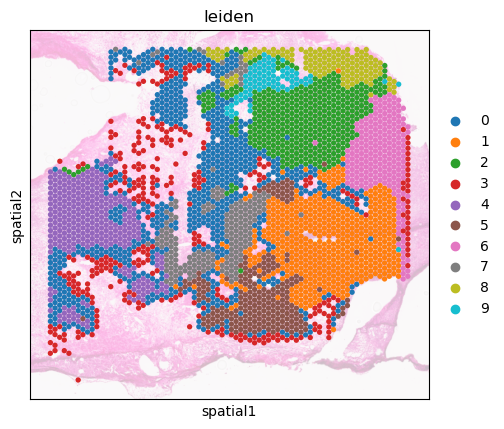

In [10]:
sc.pl.spatial(ad_vis,color='leiden',alpha_img=0.3,spot_size=400)

In [14]:
sc.tl.rank_genes_groups(ad_vis, 
                        groupby='leiden',
                        # method='wilcoxon',
                        n_genes=20,
                       )

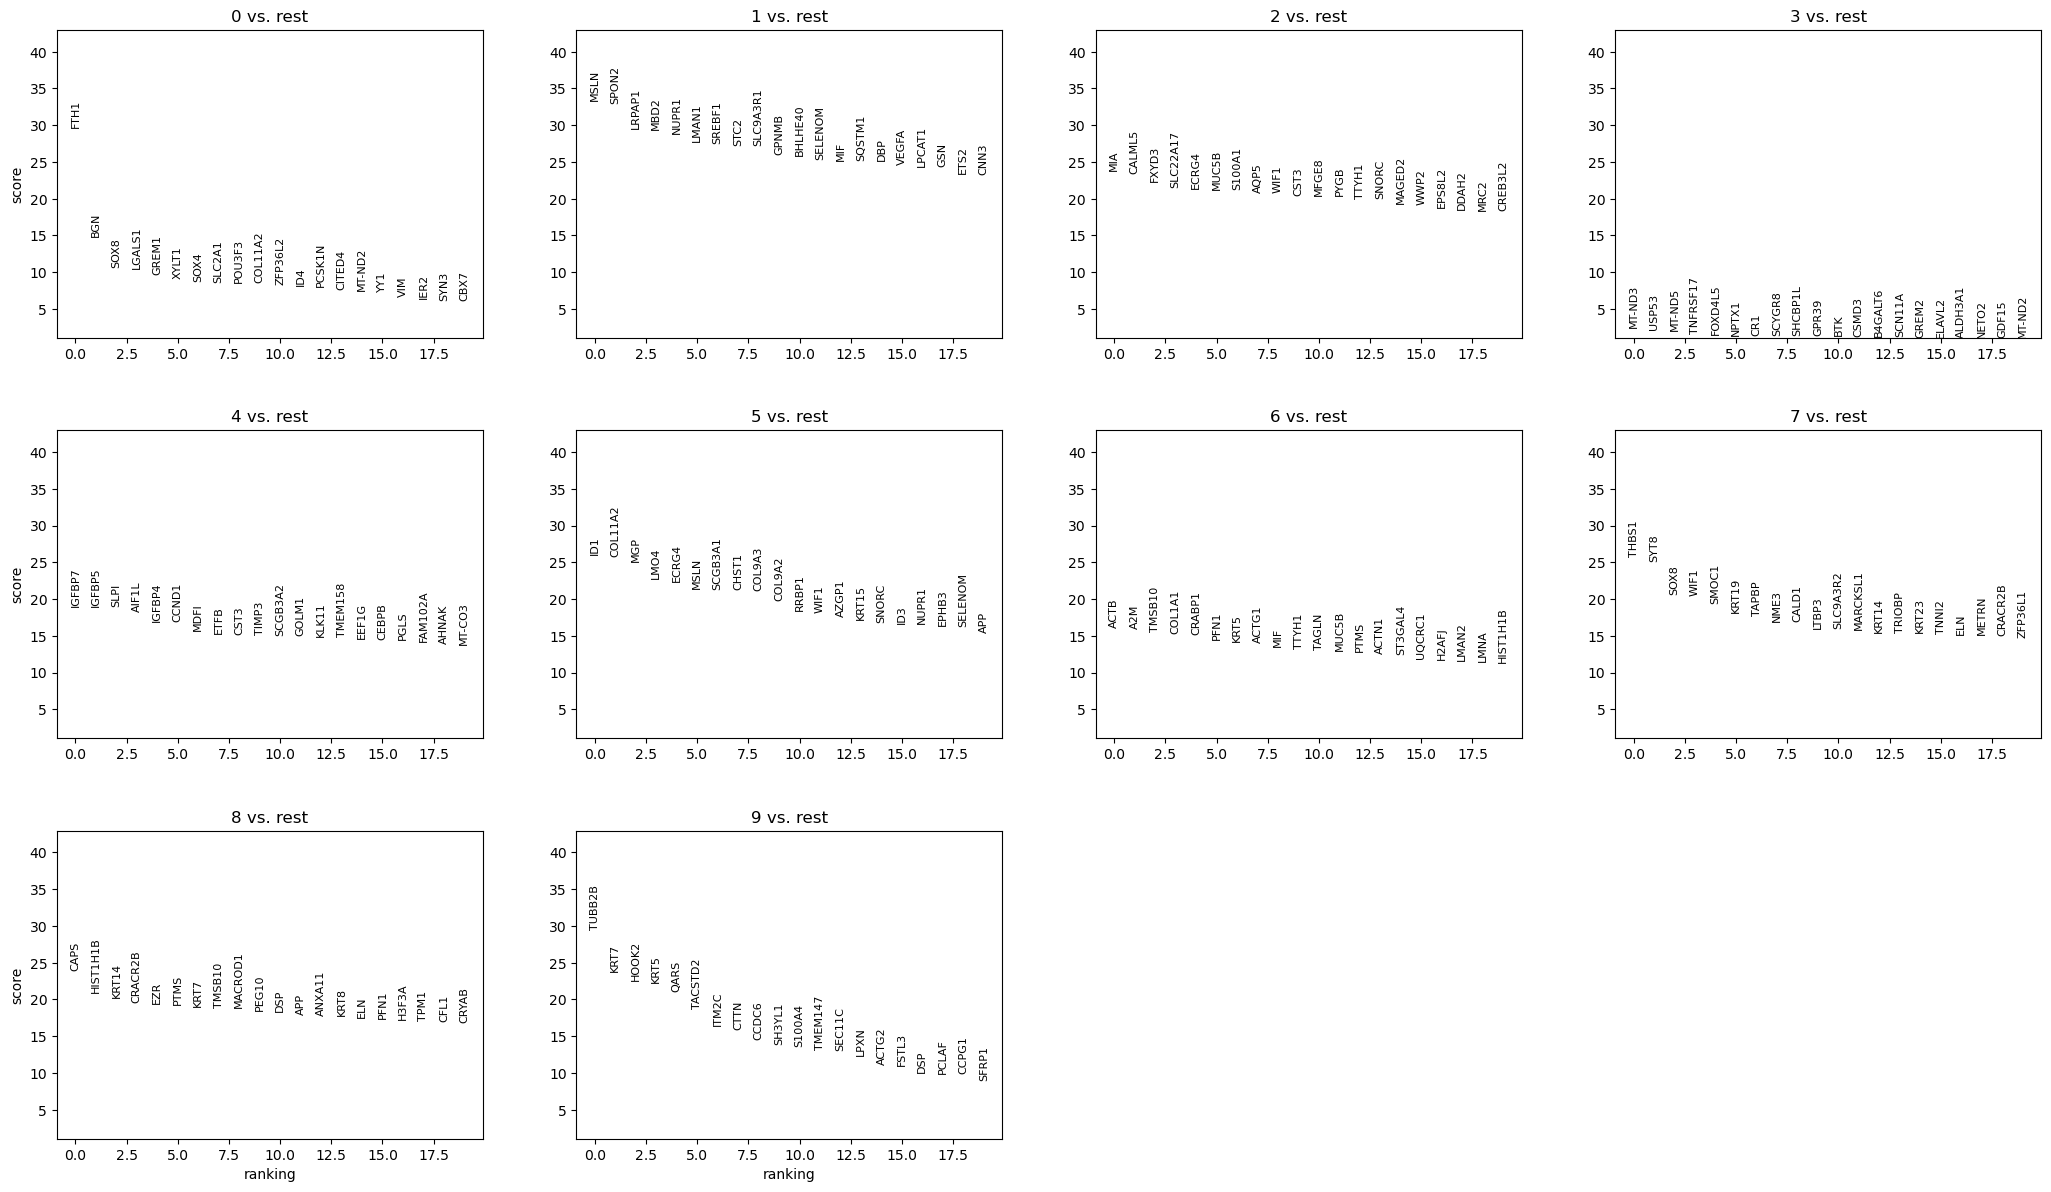

In [15]:
sc.pl.rank_genes_groups(ad_vis)

In [31]:
imm_genelist=['RORC', 'CXCR4','CD4','CD8A','TRAC','MS4A1','BANK1','APOC1','MMP12','ITGAX','CD68','CCL5',
             'MRC1','TCF4','LPXN','IL2RG','CD69','ZEB2'] 

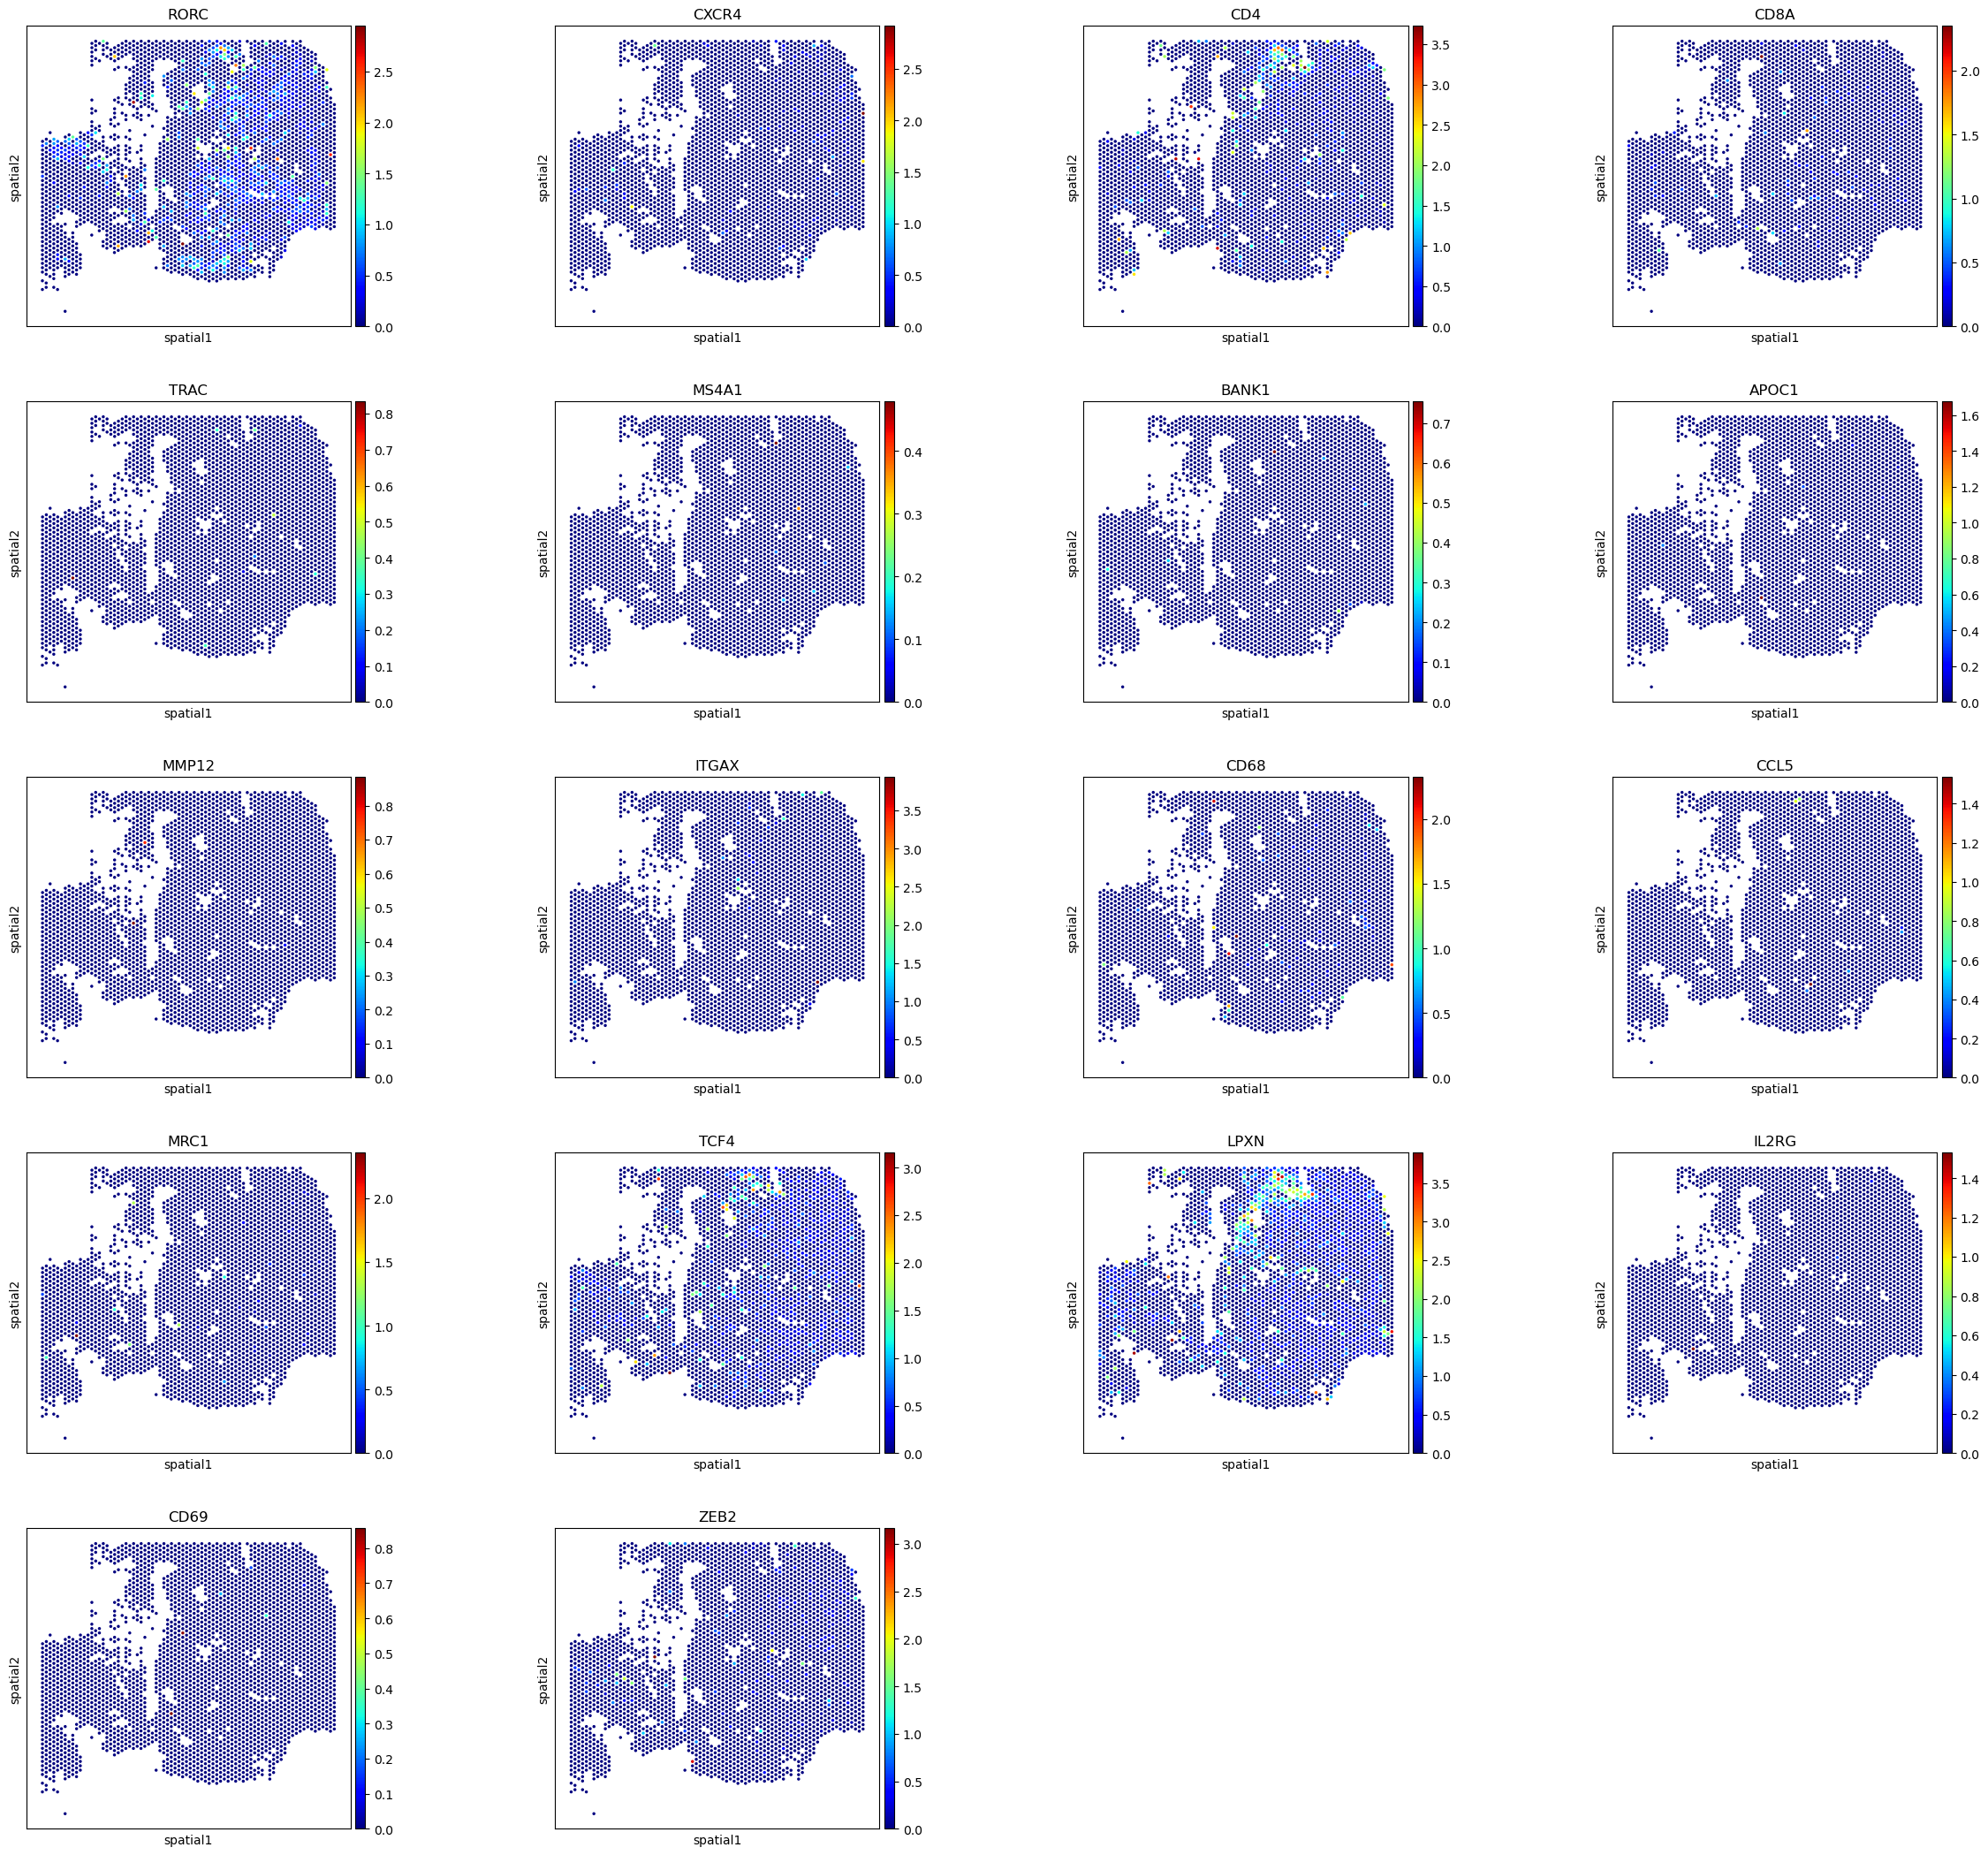

In [32]:
sc.pl.spatial(ad_vis, color=imm_genelist, alpha_img=0,cmap='jet')

In [33]:
epi_genelist=['KRT5','KRT14','KRT7','EPCAM','FASN','POSTN', 'FBLN1','PDGFRB', 'LRRC15',]

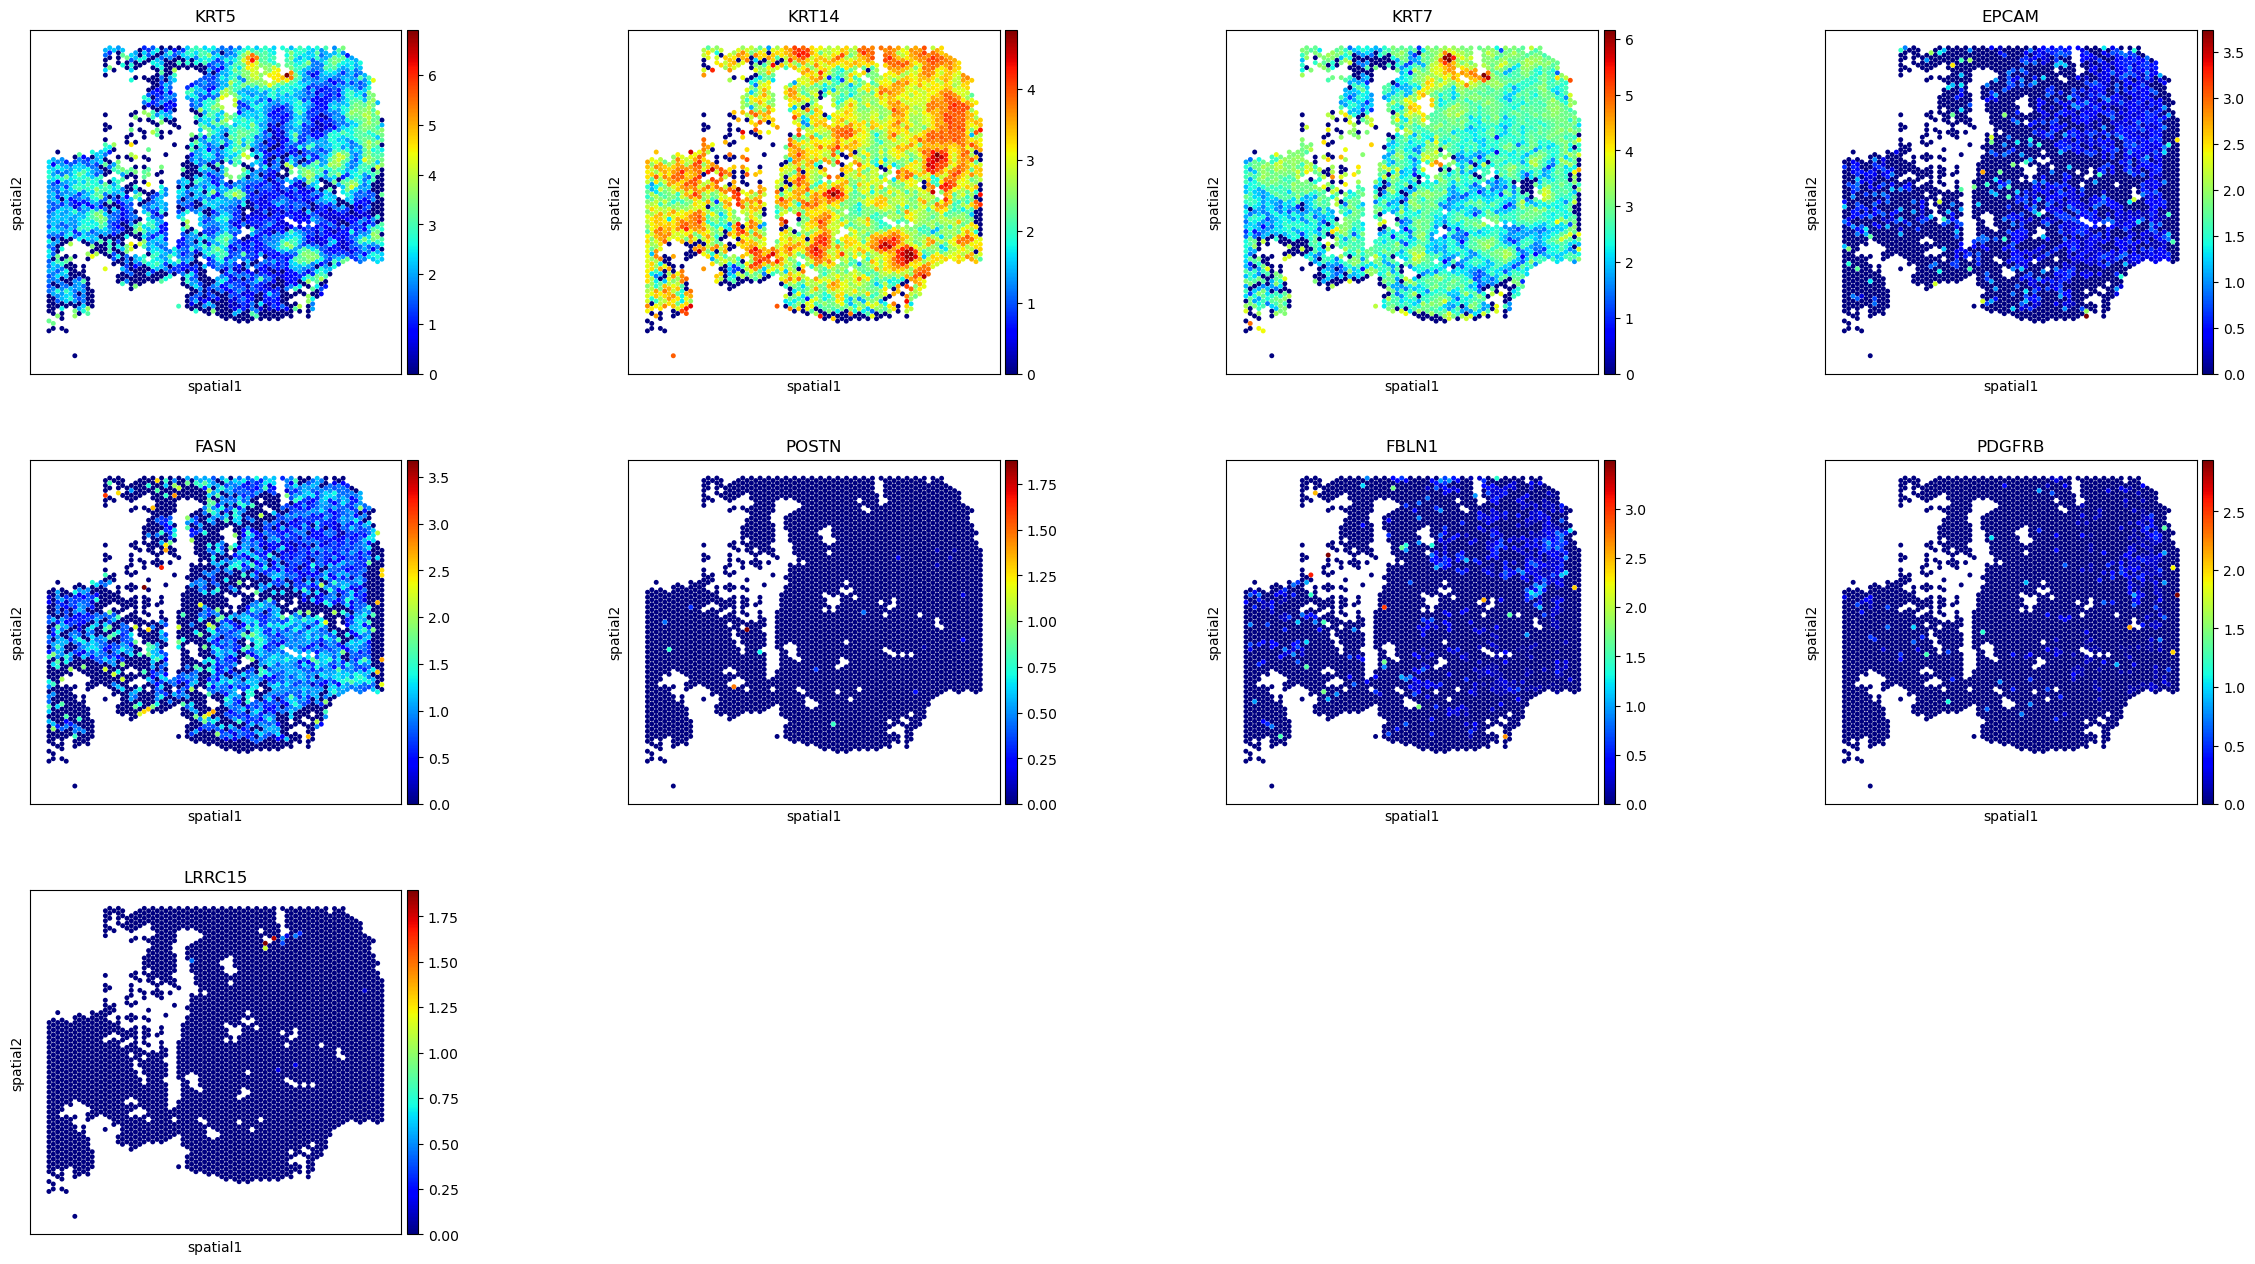

In [34]:
sc.pl.spatial(ad_vis, color=epi_genelist, alpha_img=0,cmap='jet', spot_size=400)